In [26]:
import astropy.constants as c
import astropy.units as u
import numpy as np
pi = np.pi
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 1###
1. If "ideal MHD" applies, show that the magnetic field within an interstellar cloud increases as $\rho^{2/3}$ if the cloud undergoes a spherical collapse, where ρ is the density. Discuss how the total magnetic energy, the total gravitational energy, and the total thermal energy all vary with the cloud diameter D if the spherical collapse is adiabatic. What if the collapse is isothermal?

For ideal MHD, the flux of magnetic field is freezed. Therefore,

$B = \frac{\Phi}{\pi r^2} \propto r^{-2}$

and the density change with the radius $\rho = \frac{M}{\frac{4}{3}\pi r^3} \propto r^{-3}$

We get $B \propto \rho ^{\frac{2}{3}}$

The total magnetic energy is $E_{B} = \frac{B^2}{8\pi}\times V \propto (D^{-2})^2 \times D^3 = D^{-1}$

The total gravitational energy is $E_{G} = \frac{2}{5} \frac{GM^2}{r} \propto D^{-1}$

magnetic energy and gravitational energy only depend on the state, not depend on the process. So they are the same for either adiabatic or isothermal process.

For the total thermal energy of adiabatic process,

$E_{thermal} = \frac{3}{2} NkT \propto PV \propto V^{1-\gamma} \propto D^{3-3\gamma}$

For ideal gas ($\gamma = 5/3$), $E_{thermal}=D^{-2}$. For molecular gas ($\gamma = 7/5$), $E_{thermal} = D^{-1.2}$

For the total thermal energy of isothermal process, the temperature doesn't change, and therefore the thermal energy remains the same along the whole process.

### Problem 2###
2. Consider a neutral atomic region composed of pure hydrogen at density n(H) = 100 cm–3 and temperature 100 K in which the magnetic field is 10 μG. Compute the sound speed, cs and the Alfven speed, vA. Plot the speed of (i) Alfven waves, (ii) slow magnetosonic waves, and (iii) fast magnetosonic waves as a function of the angle θ between the wave vector and the magnetic field. (Hint: you may use equation 22.23 from Shu, p. 307)

The pressure is $p = nkT = 1.38\times10^{-12}\ Ba$

sound speed $c_s = (\frac{\gamma p_0}{\rho_0})^\frac{1}{2}=1.2\times10^5\ cm/s$

Alfven speed $V_A(\theta = 0) = (\frac{B_0^2}{4\pi \rho_0})^\frac{1}{2}=2.2\times 10^5\ cm/s$

Because Alfven speed depends on the magnetic field parallel to the wave propagation direction, we have $V_A(\theta) = V_A \cos(\theta)$.

For slow mode, the speed is:
$v_{slow} = (c_s^2+v_A^2)^\frac{1}{2}(\frac{1}{2} - \sqrt{\frac{1}{4} - \frac{c_s^2 v_A^2 \cos ^2 \theta}{(c_s^2 + v_A^2)^2}})^\frac{1}{2}$

For fast mode, the speed is:
$v_{fast} = (c_s^2+v_A^2)^\frac{1}{2}(\frac{1}{2} + \sqrt{\frac{1}{4} - \frac{c_s^2 v_A^2 \cos ^2 \theta}{(c_s^2 + v_A^2)^2}})^\frac{1}{2}$

In [25]:
n = 100 * u.cm**(-3)
T = 100 * u.K
B = 10 * u.uG
gamma = 5./3
p = (n * c.k_B * T).to(u.Ba)
print 'pressure: ' 
print p
rho = n * (c.m_e + c.m_p)
c_s = ((gamma * p / rho)**(1/2.)).cgs
print 'sound speed:'
print c_s
v_A = ((B.to(u.G).value**2 / (4*pi*rho.cgs.value))**(1/2.) )
print 'Alfven speed:'
print v_A

pressure: 
1.3806488e-12 Ba
sound speed:
117259.72771 cm / s
Alfven speed:
218060.982574


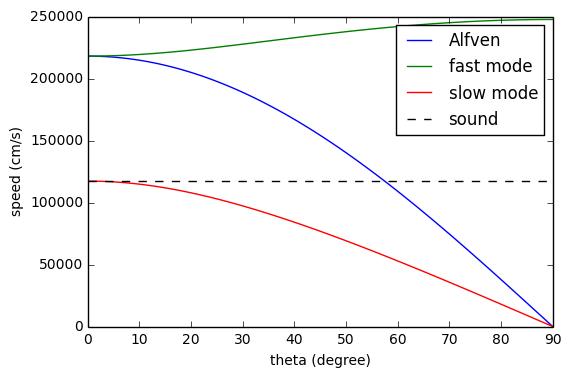

In [60]:
theta_degree_list = np.linspace(0, 90, 100)
theta_rad_list = theta_degree_list * pi / 180.
cos_list = np.cos(theta_rad_list)
plt.plot(theta_degree_list, v_A * cos_list, label='Alfven')
c_s_v = c_s.cgs.value
v_A_v = v_A
plt.plot(theta_degree_list, ((c_s_v**2+v_A_v**2)**0.5)* \
(0.5+np.sqrt(0.25-(c_s_v*v_A_v*cos_list/(c_s_v**2+v_A_v**2))**2))**0.5, label='fast mode')

plt.plot(theta_degree_list, ((c_s_v**2+v_A_v**2)**0.5)* \
(0.5-np.sqrt(0.25-(c_s_v*v_A_v*cos_list/(c_s_v**2+v_A_v**2))**2))**0.5, label='slow mode')

plt.axhline(c_s_v, ls='--', c='k', label='sound')
plt.legend()
plt.xlabel('theta (degree)')
plt.ylabel('speed (cm/s)')
plt.show()

### Problem 3###
3. What is the Mach number, v2/cs2 , immediately behind a strong non-magnetic shock propagating in a monoatomic gas?
What about in a molecular gas, if the ratio of specific heats is 7/5?

For non-magnetic shock, and assume that $M \gg 1$,

$p_2 = (\frac{2\gamma}{\gamma+1}M^2-\frac{\gamma-1}{\gamma+1})p_1 \sim \frac{2\gamma}{\gamma+1}M^2 p_1$

$v_2 = (\frac{\gamma-1}{\gamma+1} + \frac{2}{\gamma+1}\frac{1}{M^2})v_1 \sim \frac{\gamma-1}{\gamma+1} v_1$

$\rho_2 = (\frac{\gamma-1}{\gamma+1} + \frac{2}{\gamma+1}\frac{1}{M^2})^{-1}\rho_1 \sim \frac{\gamma+1}{\gamma-1}\rho_1$

and $c_{s2} = (\frac{\gamma p_2}{\rho_2})^\frac{1}{2} = (\frac{\gamma \frac{2\gamma}{\gamma+1}M^2 p_1}{\frac{\gamma+1}{\gamma-1}\rho_1})^\frac{1}{2} = \frac{\sqrt{2\gamma(\gamma-1)}M}{\gamma+1}c_{s1}$

$\frac{v_2}{c_{s2}} = \frac{\frac{\gamma-1}{\gamma+1} v_1}{\frac{\sqrt{2\gamma(\gamma-1)}}{\gamma+1}Mc_{s1}} = \frac{\gamma -1}{\sqrt{2\gamma(\gamma-1)}} = \sqrt{\frac{\gamma-1}{2\gamma}}$

where $gamma = 5/3$, Mach number is $\sqrt{\frac{2/3}{10/3}} = \frac{1}{\sqrt{5}}$

where $gamma = 7/5$, Mach number is $\sqrt{\frac{2/5}{14/5}} = \frac{1}{\sqrt{7}}$